### 正规方程应用

In [1]:
import numpy as np

from sklearn.linear_model import LinearRegression

#### 八元一次方程

In [2]:
# 上面八元一次方程对应的X数据
X = np.array([[  0 ,14 , 8 ,  0 ,  5,  -2,   9,  -3],
 [ -4 , 10 ,  6 ,  4 ,-14 , -2 ,-14  , 8],
 [ -1 , -6  , 5 ,-12 ,  3 , -3 ,  2 , -2],
 [  5 , -2  , 3 , 10  , 5 , 11 ,  4  ,-8],
 [-15 ,-15  ,-8 ,-15 ,  7 , -4, -12 ,  2],
 [ 11 ,-10 , -2 ,  4  , 3 , -9 , -6 ,  7],
 [-14 ,  0 ,  4 , -3  , 5 , 10 , 13 ,  7],
 [ -3 , -7 , -2 , -8  , 0 , -6 , -5 , -9]])
# 对应的y
y = np.array([ 339 ,-114  , 30 , 126, -395 , -87 , 422, -309])
display(X,y)

array([[  0,  14,   8,   0,   5,  -2,   9,  -3],
       [ -4,  10,   6,   4, -14,  -2, -14,   8],
       [ -1,  -6,   5, -12,   3,  -3,   2,  -2],
       [  5,  -2,   3,  10,   5,  11,   4,  -8],
       [-15, -15,  -8, -15,   7,  -4, -12,   2],
       [ 11, -10,  -2,   4,   3,  -9,  -6,   7],
       [-14,   0,   4,  -3,   5,  10,  13,   7],
       [ -3,  -7,  -2,  -8,   0,  -6,  -5,  -9]])

array([ 339, -114,   30,  126, -395,  -87,  422, -309])

八元一次方程，唯一解，请问至少需要几个方程呢？

In [3]:
model = LinearRegression(fit_intercept=False)
model.fit(X,y) # 训练
display(model.coef_,model.intercept_)

array([ 1.,  5., 15.,  3.,  8.,  4., 17., 12.])

0.0

In [4]:
# 标准答案~
np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

array([ 1.,  5., 15.,  3.,  8.,  4., 17., 12.])

#### 八元一次方程添加截距

In [5]:
# 设截距是12

# 目标值进行移动，向上移动，加法运算
print('截距是0：',y)
y += 12
print('增加了截距',y)

截距是0： [ 339 -114   30  126 -395  -87  422 -309]
增加了截距 [ 351 -102   42  138 -383  -75  434 -297]


$\hat{y} = w_1X_1 + w_2X_2 + …… + w_nX_n + b$

b 也是一个未知变量  
需要进行方程求解

$\hat{y} = w_1X_1 + w_2X_2 + …… + w_nX_n + w_0 * 1$

In [8]:
# 向其后面增加一列
X = np.concatenate([X,np.full(shape = (8,1),fill_value=1)],axis = 1)
X

array([[  0,  14,   8,   0,   5,  -2,   9,  -3,   1],
       [ -4,  10,   6,   4, -14,  -2, -14,   8,   1],
       [ -1,  -6,   5, -12,   3,  -3,   2,  -2,   1],
       [  5,  -2,   3,  10,   5,  11,   4,  -8,   1],
       [-15, -15,  -8, -15,   7,  -4, -12,   2,   1],
       [ 11, -10,  -2,   4,   3,  -9,  -6,   7,   1],
       [-14,   0,   4,  -3,   5,  10,  13,   7,   1],
       [ -3,  -7,  -2,  -8,   0,  -6,  -5,  -9,   1]])

In [9]:
np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

array([   4.2890625 ,    0.8203125 ,   20.84375   ,   18.421875  ,
         -7.83984375,  -16.2421875 ,   13.73828125,   -4.8671875 ,
       -166.28125   ])

In [10]:
model = LinearRegression(fit_intercept=False)
model.fit(X,y)
display(model.coef_,model.intercept_)

array([-0.28902686,  3.99875919, 17.18947808,  4.3391324 ,  8.59756611,
        2.82031444, 16.74961517, 11.58693282,  4.16860692])

0.0

In [11]:
# 8代表8个方程，9代表计算的未知数
# 8个9元一次方程 ，没有固定解
# x + y = 3 二元一次方程，只有一个，有解吗？
X.shape

(8, 9)

#### 增加一个方程

In [31]:
# 标准答案
w = np.array([ 1.,  5., 15.,  3.,  8.,  4., 17., 12.])
w

array([ 1.,  5., 15.,  3.,  8.,  4., 17., 12.])

In [13]:
# 第9个方程
X9 = np.random.randint(-15,15,size = 8)
X9

array([ 13,   5,   1,   8,  -3, -10,  10,   2])

In [16]:
# 上面的8个方程，都有截距是12，第九个方程也一样
X9.dot(w) + 12

y = np.concatenate([y,[219]])
y

array([ 351, -102,   42,  138, -383,  -75,  434, -297,  219])

In [20]:
X9 = np.concatenate([X9,[1]])
X9

array([ 13,   5,   1,   8,  -3, -10,  10,   2,   1])

In [23]:
X = np.concatenate([X,[X9]])
X

array([[  0,  14,   8,   0,   5,  -2,   9,  -3,   1],
       [ -4,  10,   6,   4, -14,  -2, -14,   8,   1],
       [ -1,  -6,   5, -12,   3,  -3,   2,  -2,   1],
       [  5,  -2,   3,  10,   5,  11,   4,  -8,   1],
       [-15, -15,  -8, -15,   7,  -4, -12,   2,   1],
       [ 11, -10,  -2,   4,   3,  -9,  -6,   7,   1],
       [-14,   0,   4,  -3,   5,  10,  13,   7,   1],
       [ -3,  -7,  -2,  -8,   0,  -6,  -5,  -9,   1],
       [ 13,   5,   1,   8,  -3, -10,  10,   2,   1]])

In [25]:
w

array([ 1.,  5., 15.,  3.,  8.,  4., 17., 12.])

In [24]:
np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

array([ 1.,  5., 15.,  3.,  8.,  4., 17., 12., 12.])

In [27]:
model = LinearRegression(fit_intercept=False)
model.fit(X,y)
display(model.coef_,model.intercept_)

array([ 1.,  5., 15.,  3.,  8.,  4., 17., 12., 12.])

0.0

In [28]:
# 四舍五入，截距：12
model = LinearRegression(fit_intercept=True)
model.fit(X,y)
display(model.coef_,model.intercept_)

array([ 1.,  5., 15.,  3.,  8.,  4., 17., 12.,  0.])

11.999999999999716

In [30]:
# 四舍五入，截距：12
model = LinearRegression(fit_intercept=True)
# 截距去掉！
model.fit(X[:,:-1],y)
display(model.coef_,model.intercept_)

array([ 1.,  5., 15.,  3.,  8.,  4., 17., 12.])

11.999999999999723

### 正规方程计算

#### 简单线性回归（一个系数，变量）

一元一次方程真实的斜率和截距是： [1] [5]
通过正规方程求解的斜率和截距是： [[0.97]
 [5.07]]


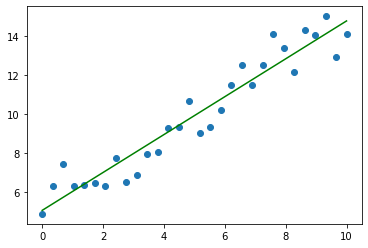

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# 转化成矩阵，reshape
X = np.linspace(0,10,num = 30).reshape(-1,1)
# 斜率和截距，随机生成
w = np.random.randint(1,5,size = 1)
b = np.random.randint(1,10,size = 1)

# 根据一元一次方程计算目标值y，并加上“噪声”，数据有上下波动~
# 目标值y真实值！！！
y = X * w + b + np.random.randn(30,1)


plt.scatter(X,y)


# 重新构造X，b截距，相当于系数w0，前面统一乘以1
X = np.concatenate([X,np.full(shape = (30,1),fill_value= 1)],axis = 1)

# 正规方程求解
θ = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y).round(2)

print('一元一次方程真实的斜率和截距是：',w, b)
print('通过正规方程求解的斜率和截距是：',θ)

# 根据求解的斜率和截距绘制线性回归线型图
plt.plot(X[:,0],X.dot(θ),color = 'green')

#### 复杂多元一次方程（二元举例，画图）

二元一次方程真实的斜率和截距是： [1 4 2]
通过正规方程求解的斜率和截距是： [1.  4.  1.9]


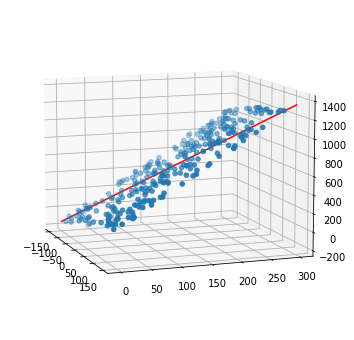

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D # 绘制三维图像
# 转化成矩阵
x1 = np.random.randint(-150,150,size = (300,1))
x2 = np.random.randint(0,300,size = (300,1))

# 斜率和截距，随机生成
w = np.random.randint(1,5,size = 2)
b = np.random.randint(1,10,size = 1)

# 根据二元一次方程计算目标值y，并加上“噪声”，数据有上下波动~
y = x1 * w[0] + x2 * w[1] + b + np.random.randn(300,1)


fig = plt.figure(figsize=(9,6))
ax = plt.subplot(111,projection = '3d')
ax.scatter(x1,x2,y) # 三维散点图
ax.view_init(elev=10, azim=-20) # 调整视角

# 重新构造X，将x1、x2以及截距b，相当于系数w0，前面统一乘以1进行数据合并
X = np.concatenate([x1,x2,np.full(shape = (300,1),fill_value=1)],axis = 1)
w = np.concatenate([w,b])
# 正规方程求解
θ = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y).round(2)

print('二元一次方程真实的斜率和截距是：',w)
print('通过正规方程求解的斜率和截距是：',θ.reshape(-1))

# # 根据求解的斜率和截距绘制线性回归线型图
x = np.linspace(-150,150,100)
y = np.linspace(0,300,100)
z = x * θ[0] + y * θ[1] + θ[2]
ax.plot(x,y,z ,color = 'red')

### sklearn线性回归

#### 简单线性回归

一元一次方程真实的斜率和截距是： [2] [4]
通过scikit-learn求解的斜率和截距是： [[2.03820007]] [3.66036694]


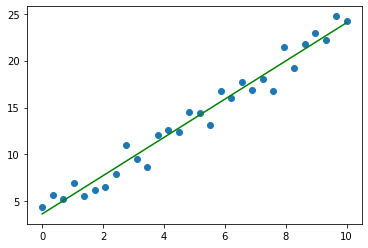

In [37]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
# 转化成矩阵
X = np.linspace(0,10,num = 30).reshape(-1,1)
# 斜率和截距，随机生成
w = np.random.randint(1,5,size = 1)
b = np.random.randint(1,10,size = 1)
# 根据一元一次方程计算目标值y，并加上“噪声”，数据有上下波动~
y = X * w + b + np.random.randn(30,1)
plt.scatter(X,y)

# 使用scikit-learn中的线性回归求解
model = LinearRegression()
model.fit(X,y)

w_ = model.coef_
b_ = model.intercept_
print('一元一次方程真实的斜率和截距是：',w, b)
print('通过scikit-learn求解的斜率和截距是：',w_,b_)
plt.plot(X,X.dot(w_) + b_,color = 'green')

#### 复杂线性回归（二元）

二元一次方程真实的斜率和截距是： [3 2] [4]
通过scikit-learn求解的斜率和截距是： [3.00049364 1.99981677] [3.98646647]


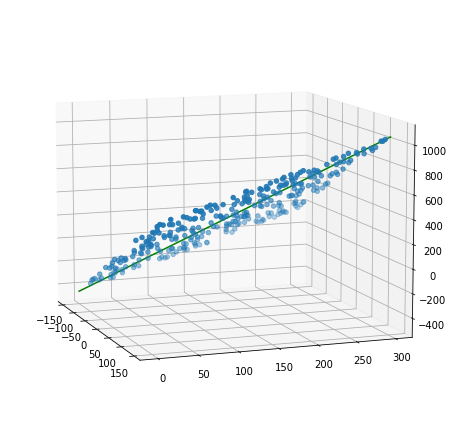

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# 转化成矩阵
x1 = np.random.randint(-150,150,size = (300,1))
x2 = np.random.randint(0,300,size = (300,1))
# 斜率和截距，随机生成
w = np.random.randint(1,5,size = 2)
b = np.random.randint(1,10,size = 1)
# 根据二元一次方程计算目标值y，并加上“噪声”，数据有上下波动~
y = x1 * w[0] + x2 * w[1] + b + np.random.randn(300,1)

fig = plt.figure(figsize=(9,6))
ax = Axes3D(fig)
ax.scatter(x1,x2,y) # 三维散点图
ax.view_init(elev=10, azim=-20) # 调整视角


# 重新构造X，将x1、x2以及截距b，相当于系数w0，前面统一乘以1进行数据合并
X = np.concatenate([x1,x2],axis = 1)
# 使用scikit-learn中的线性回归求解
model = LinearRegression()
model.fit(X,y)
w_ = model.coef_.reshape(-1)
b_ = model.intercept_


print('二元一次方程真实的斜率和截距是：',w,b)
print('通过scikit-learn求解的斜率和截距是：',w_,b_)
# # 根据求解的斜率和截距绘制线性回归线型图
x = np.linspace(-150,150,100)
y = np.linspace(0,300,100)
z = x * w_[0] + y * w_[1] + b_
ax.plot(x,y,z ,color = 'green')